 <table width=100%>
<tr>
    <td><h1 style="text-align: left; font-size:300%;">
        Classification Project
    </h1></td>
    <td width="25%">
    <div style="text-align: right">
    <b> Machine Learning 2022</b> <br>
    <b>Project 2 
</tr>
</table>

# Table of contents

1. Aim and objectives of the project
2. Exploratory Data Analysis
3. Data Preprocessing
4. Data Modelling
5. Results, discussion and conclusion

---
---

# 1. Aim and objectives of the project

In this project, we will work in the classification setting, where a number of training observations are used to build a classifier, and then predict a **qualitative response**.
We want our classifier to perform well not only on the training data, but also on test observations that were not used to train the classifier.
In our work, many classification techniques will be used and a comparison between them will be carried out.

The dataset used to perform the analysis (Breast Cancer Wisconsin Dataset) contains cytological characteristics of breast fine-needle aspirates. Breast cancer is one of the most common cancers found, and an early detection provides the possibility of its cure. Furthermore, an accurate evaluation of tumor staging is crucial for the assessment of the specific treatment.
This study is aimed to **classify benign and malignant cells** by means of classification algorithms, such as logistic regression, linear discriminant analysis, K-nearest neighbors and supported vector machines.

To carry out our study, we followed the workflow reported below.

- Dataset exploratory analysis to detect patterns, class distribution, and eventual issues;
- Preprocessing of the data to correctly send them through models; we check for null values, data types, correlation. 
- Baseline setting to compare the performance of the models we will run;
- Modelling by means of Machine Learning techniques, i.e. logistic regression, linear discriminant analysis, K-nearest neighbors and supported vector machines;
- Results and discussion.

 # 2. Exploratory Data Analysis

### Breast Cancer Wisconsin Dataset description

This breast cancer dataset was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg.
It contains 699 instances with 10 attributes, of which 1 is the sample code number and 9 are cytological characteristics of breast fine-needle aspirates, plus the class attribute.

-  1. Sample code number
-  2. Clump Thickness   
-  3. Uniformity of Cell Size
-  4. Uniformity of Cell Shape
-  5. Marginal Adhesion       
-  6. Single Epithelial Cell Size
-  7. Bare Nuclei                
-  8. Bland Chromatin            
-  9. Normal Nucleoli            
- 10. Mitoses                    
- 11. Class

The cytological characteristics were valued on a scale of 1 to 10, with 1 being the closest to benign and 10 the most anaplastic. The class is represented by value=2 for benign,  value=4 for malignant.

In [2]:
# import packages that will be needed for the subsequent analysis
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import scipy
import statsmodels.api as sm


np.random.seed(0)

### Dataset Visualization

We first read the dataset and create a pandas DataFrame, renaming columns with appropriate names.

In [4]:
brca_data = pd.read_csv("bc_data",
                        names=["ID", "thickness", "cell_size", "cell_shape", "adhesion", "epithelial_size", "nuclei", "chromatin", "nucleoli", "mitoses", "class"])
brca_data.head()

,ID,thickness,cell_size,cell_shape,adhesion,epithelial_size,nuclei,chromatin,nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### Patterns and correlation

We now use a **pairplot** and a **correlation matrix** to visualize the given data and to to find the relationship between them.
Class values are being renamed for a better visualization.

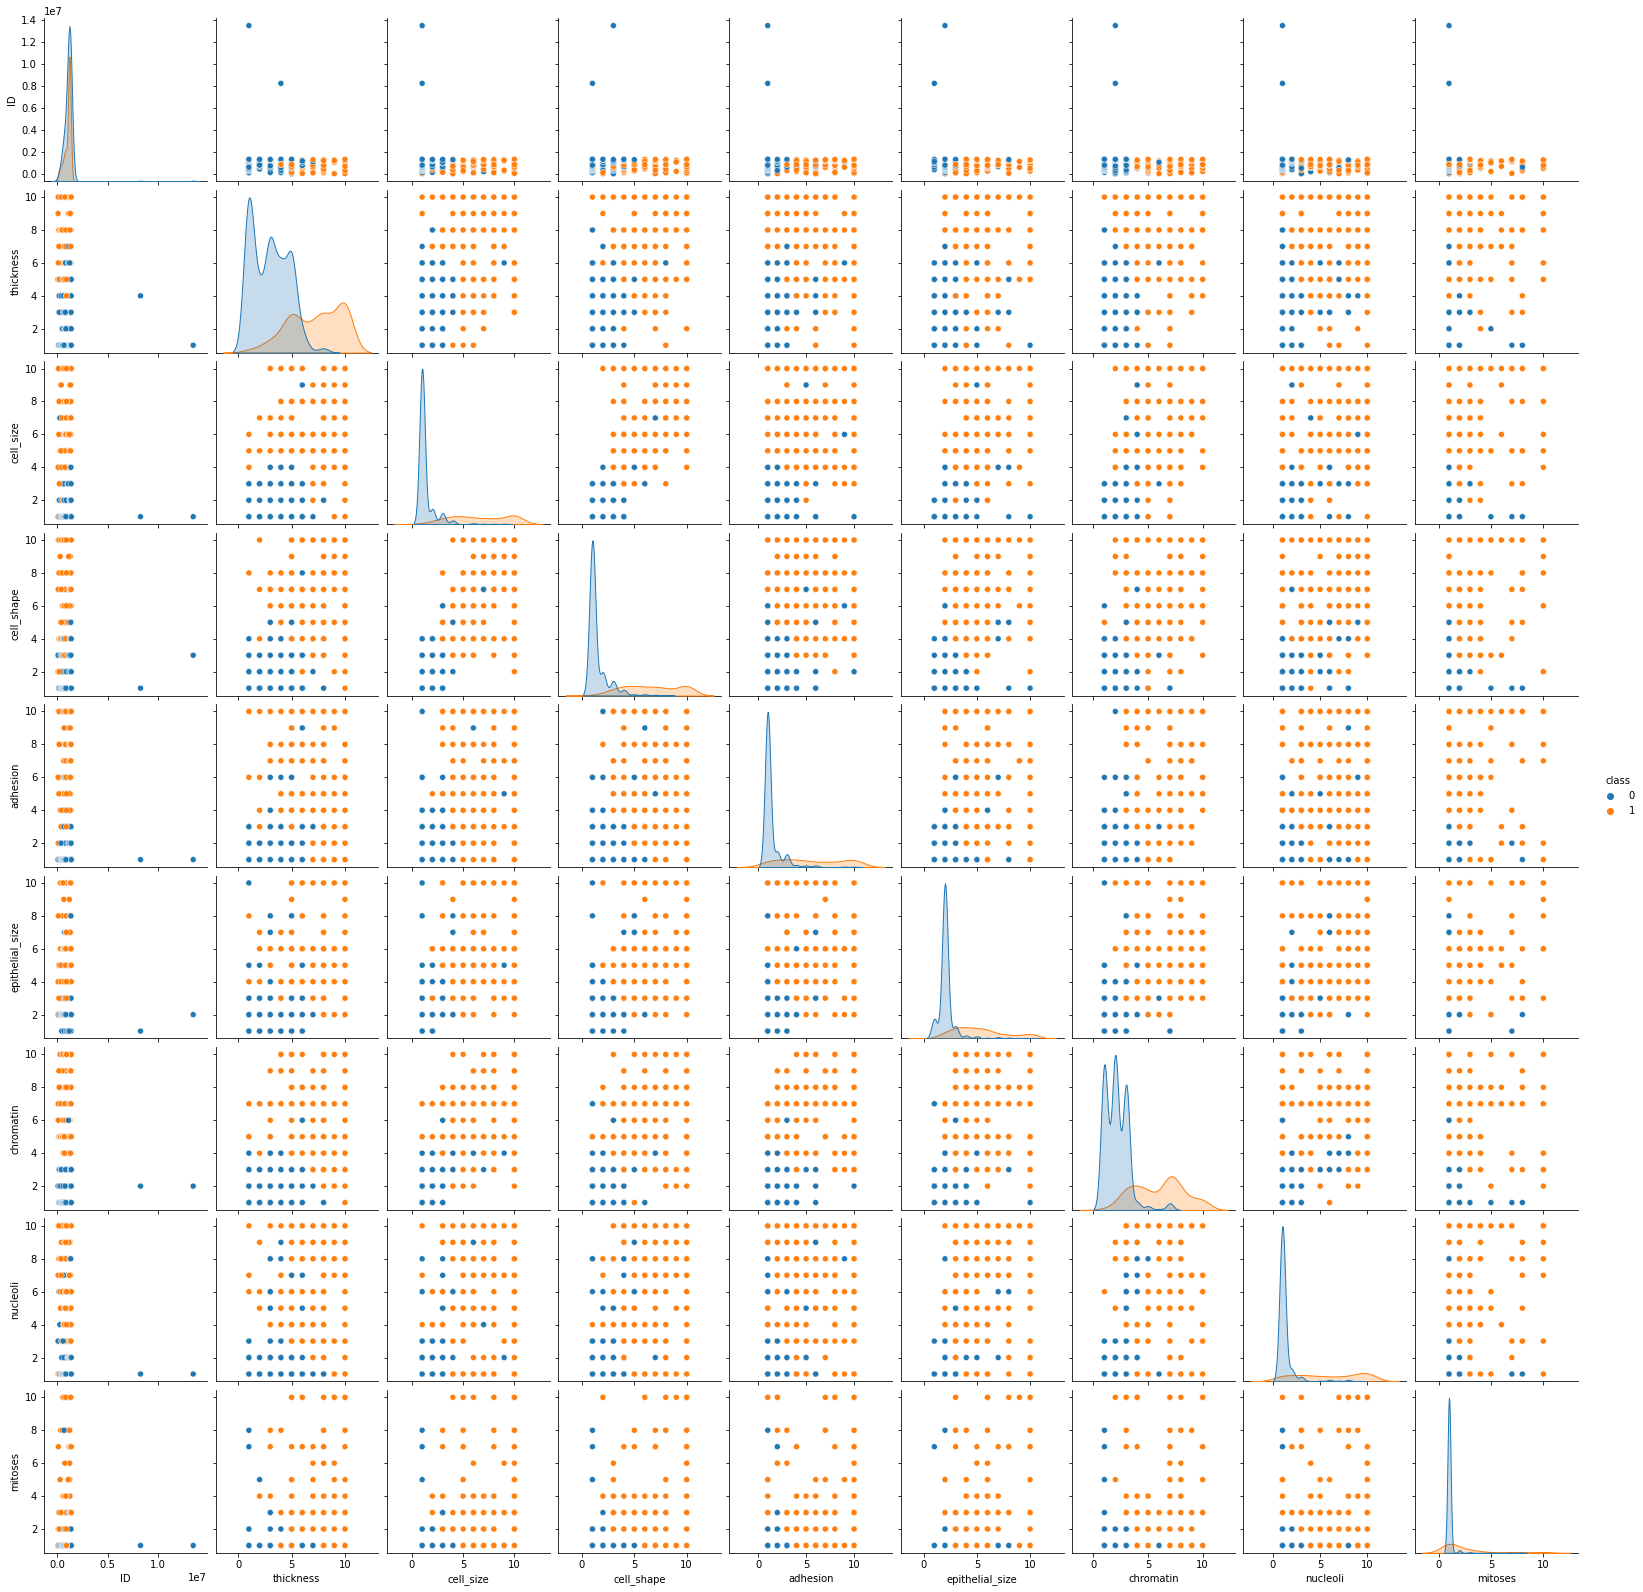

In [5]:
# Replace 2(benign)/4(malignant) with 1/0
brca_data["class"] = brca_data["class"].replace({4: 1, 2:0})
sns.pairplot(brca_data, hue="class")

In [6]:
corr = brca_data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/var/folders/66/9jfzllnx3p30h2fff0s29spm0000gn/T/ipykernel_35520/3983812634.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,ID,thickness,cell_size,cell_shape,adhesion,epithelial_size,chromatin,nucleoli,mitoses,class
ID,1.00,-0.06,-0.04,-0.04,-0.06,-0.05,-0.06,-0.05,-0.03,-0.08
thickness,-0.06,1.00,0.64,0.65,0.49,0.52,0.56,0.54,0.35,0.72
cell_size,-0.04,0.64,1.00,0.91,0.71,0.75,0.76,0.72,0.46,0.82
cell_shape,-0.04,0.65,0.91,1.00,0.68,0.72,0.74,0.72,0.44,0.82
adhesion,-0.06,0.49,0.71,0.68,1.00,0.60,0.67,0.60,0.42,0.70
epithelial_size,-0.05,0.52,0.75,0.72,0.60,1.00,0.62,0.63,0.48,0.68
chromatin,-0.06,0.56,0.76,0.74,0.67,0.62,1.00,0.67,0.34,0.76
nucleoli,-0.05,0.54,0.72,0.72,0.60,0.63,0.67,1.00,0.43,0.71
mitoses,-0.03,0.35,0.46,0.44,0.42,0.48,0.34,0.43,1.00,0.42
class,-0.08,0.72,0.82,0.82,0.70,0.68,0.76,0.71,0.42,1.00


We can observe that all the variables have a correlation > 0.5 with the class, except for mitoses.
We can also notice:
- cell_shape and cell_size positively correlated
- cell_size and chromatin positevely correlated
- cell_shape and chromatin positevely correlated

We will take this information into account for **variable selection**.

### Variables information and class frequencies

We print information on index dtypes, columns, and non-null values.

In [7]:
brca_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               699 non-null    int64 
 1   thickness        699 non-null    int64 
 2   cell_size        699 non-null    int64 
 3   cell_shape       699 non-null    int64 
 4   adhesion         699 non-null    int64 
 5   epithelial_size  699 non-null    int64 
 6   nuclei           699 non-null    object
 7   chromatin        699 non-null    int64 
 8   nucleoli         699 non-null    int64 
 9   mitoses          699 non-null    int64 
 10  class            699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


The dataframe contains 699 entries and 10 variables of which 9 observations and 1 outcome variable.

We notice that Dtypes of the variables are not the same, we will proceed to uniform them into int64 dtypes.

In [6]:
#brca_data = brca_data.astype(np.int64)

Running the latter piece of code, we notice that an exception is raised as some entries have null values named with the string '?'. We proceed to rename those entries with NA and count them values.

In [8]:
# Substitute missing values with NAN
brca_data.replace('?', np.nan, inplace=True)
# Check how many samples with missing values there are
print(brca_data.isna().sum())

ID                  0
thickness           0
cell_size           0
cell_shape          0
adhesion            0
epithelial_size     0
nuclei             16
chromatin           0
nucleoli            0
mitoses             0
class               0
dtype: int64


We now compute the frequencies of the two classes:

In [9]:
brca_data["class"].value_counts()

0    458
1    241
Name: class, dtype: int64

We can observe that the dataset is **imbalanced**, with 65% of "benign" class and 35% of "malignant" class.

This observation gives us important insights, and will be crucial in choosing the right **metric** to evaluate our models. In fact, ignoring this information and chosing the wrong metric, would reflect in the choice of a poor model, or to be misled about its expected performance.
In general, with imbalanced datasets, classification errors with the minority class are more important than those with the majority class. Performance metrics may be needed to focus on the minority class, which is made challenging because we lack observations required to train an effective model.
In our case, an incorrect benign diagnosis (false negative) would be an error of greater importance. 

Another important adaptation we should apply, given that the dataset is imbalanced, is **stratification**. Stratification ensure that the train and test sets have approximately the same percentage of samples of each target class as the complete set.


In the end, of our exploratory data analysis showed:

- **High correlation** between most of the variables and the class;
- **Collinearity** between variables;
- Presence of **null values** to be properly managed;
- **Imbalanced Dataset**.

# 3. Data Preprocessing

### Informative/Non-informative variables

To be consistent with the scope of our study, we know from a clinical point of view, that all the variables are informative except for the patients' IDs. We thus remove that column:

In [10]:
brca_data.drop('ID' , inplace=True, axis=1)

### Missing values

Missing values are very few (16) compared to the n data cases, so we can safely remove them and perform training on the remaining samples.

In [11]:
# Remove them
brca_data = brca_data.dropna(axis=0)
print(brca_data.isna().sum())
brca_data = brca_data.astype(np.int64)

thickness          0
cell_size          0
cell_shape         0
adhesion           0
epithelial_size    0
nuclei             0
chromatin          0
nucleoli           0
mitoses            0
class              0
dtype: int64


### Train + Test Splitting with stratification

As we said before, we want our classifier to perform well not only on the training data, but also on test observations that were not used to train the classifier. We then proceed with the splitting.
We also mentioned above that when response classes are unbalanced, a **stratification** should be included to make sure that there is no bias by over- or under-representation of classes in the sets.

In [12]:
from sklearn.model_selection import train_test_split, StratifiedKFold
y = brca_data["class"].to_numpy().astype(np.int64)
X_full_feat = ["thickness", "cell_size", "cell_shape","adhesion","epithelial_size","nuclei","chromatin","nucleoli", "mitoses"]
X_full = brca_data[X_full_feat]
X_full_train, X_full_test, y_train, y_test = train_test_split(X_full, y, test_size=0.2, random_state=42, stratify=y) 

# 4. Data Modelling

### Baseline setting

We first proceed to create a baseline to further compare it to more complex solutions. 
A baseline creates predictions. We use these predictions to measure the baseline's performance with some **metrics**. The metrics will then become what we will compare any other algorithm against.
If we achieve a better score than the baseline, it will be a "good" model.

Predicting the majority class, we know that we will achieve an accuracy that is at least as high as the composition of the majority class in the training dataset.
That is, if 65% of the examples in the training set are class "benign", and we predicted class "benign" for all examples, then we know that we would at least achieve an accuracy of 65%. 
This information should give us a warning that accuracy would be a "dangerous" metric to use.

In [13]:
from scipy.stats import mode
from sklearn.metrics import accuracy_score
 
# predict the majority class
def majority_class(y):
    return mode(y)[0]
yhat = [majority_class(y_test) for _ in range(len(y_test))]

In [14]:
from sklearn import metrics
print(metrics.classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        89
           1       0.00      0.00      0.00        48

    accuracy                           0.65       137
   macro avg       0.32      0.50      0.39       137
weighted avg       0.42      0.65      0.51       137



/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

### Metric Choice

We will now implement and test some widely-used classifiers.
In all the following models we will use **F1** as metric, while accuracy has been discarded as it fails on classification problems with a skewed class distribution.
For imbalanced data, it is better using the F1 score, which takes into account not only the number of prediction errors that the model makes, but that also looks at the **type of errors** that are made.
In our case, an undiagnosed malignant cell has a higher weight as an error.
Since the F1 score is an average of Precision and Recall, it means that the F1 score gives equal weight to Precision and Recall:
- A model will obtain a **high F1 score** if both Precision and Recall are high
- A model will obtain a **low F1 score** if both Precision and Recall are low
- A model will obtain a **medium F1** score if one of Precision and Recall is low and the other is high

### Multiple Logistic Regression

Multiple logistic regression is used to predict the probability of a binary event. In our case, given a set of cytological measurements, we aim to determine if a cancer cell is benign/malignant.

In [28]:
from sklearn.linear_model import LogisticRegression            # model selection
model = LogisticRegression(solver='newton-cg', penalty='none') # hyperparameter selection
model.fit(X_full_train, y_train)                               # model fitting
y_predict = lr.predict(X_full_test)  

from sklearn.metrics import f1_score

print("Train F1 score:", f1_score(y_train, model.predict(X_full_train)))
print("Test F1 score:", f1_score(y_test, y_predict))

LogisticRegression(penalty='none', solver='newton-cg')

Train F1 score: 0.963157894736842
Test F1 score: 0.9494949494949494


We can see an improvement of the f1 test score with respect to the baseline.

We compute and display the **confusion matrix** for summarizing the performance of our model.
It gives us insight into the errors being made by your classifier and more importantly the types of errors that are being made.

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

cm = confusion_matrix(y_test,y_predict)
cm.shape
print(cm)

(2, 2)

[[85  4]
 [ 1 47]]


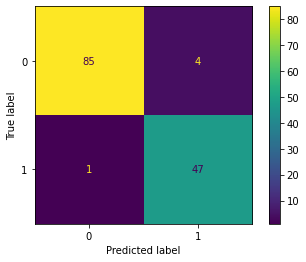

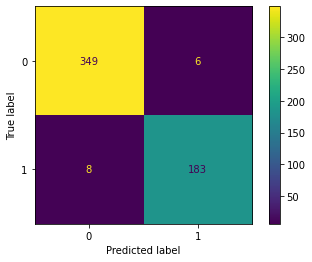

In [30]:
# Plot test confution matrix
plot_confusion_matrix(model, X_full_test, y_test)
# Plot train confution matrix
plot_confusion_matrix(model, X_full_train, y_train)
plt.show()

- The total actual benign cells in the dataset is the sum of the values on the first column.
- The total actual malign cells in the dataset is the sum of values in the second column.
- The correct values are organized in a diagonal line from top left to bottom-right of the matrix.
- More errors were made by predicting benign as malignant than predicting malignant as benign.

We now proceed to compute the z-scores of the variables used in the model.

In [31]:
from scipy.stats import norm, zscore

def z_test(X, y, model, names, alpha=None):
    n_samples, n_features = X.shape
    betas = np.concatenate([model.intercept_, model.coef_.reshape(-1)])
    
    # Compute the prediction
    pred = model.predict_proba(X) # [N, 2]
    y = y.reshape(-1)    
    X = np.concatenate([np.ones([X.shape[0], 1]), X], axis=-1)
    n_samples, n_features = X.shape
    
    V = np.diagflat(np.product(pred, axis=1))
    covLogit = np.linalg.inv(np.dot(np.dot(X.T, V), X))
    se_b = np.sqrt(np.diag(covLogit)) 
    
    z_stat_b = (betas-0)/se_b

    # Compute the p-value (two-sided test)
    p_values = np.array([2 * norm.sf(np.abs(z_stat)) for z_stat in z_stat_b])
    
    df = pd.DataFrame()
    df["Name"] = names
    df["Coefficients"] = betas
    df["Standard Errors"] = np.round(se_b, decimals=4)
    df["Z-stat"] = np.round(z_stat_b, decimals=1)
    df["p-value"] = p_values
    if alpha:
        rejectH0 = p_values < alpha
        df["reject H0"] = rejectH0    
    
    return df

z_test(X_full_train, y_train, lr, ["Intercept", *X_full_feat], alpha=0.005)

,Name,Coefficients,Standard Errors,Z-stat,p-value,reject H0
0,Intercept,-10.931805,1.5083,-7.2,4.243363e-13,True
1,thickness,0.598517,0.1740,3.4,5.825220e-04,True
2,cell_size,0.084924,0.3077,0.3,7.825695e-01,False
3,cell_shape,0.217474,0.3402,0.6,5.226704e-01,False
4,adhesion,0.364836,0.1616,2.3,2.397650e-02,False
5,epithelial_size,0.189664,0.1891,1.0,3.158438e-01,False
6,nuclei,0.609052,0.1369,4.4,8.685143e-06,True
7,chromatin,0.310953,0.1918,1.6,1.049097e-01,False
8,nucleoli,0.157118,0.1436,1.1,2.739883e-01,False
9,mitoses,0.681265,0.3301,2.1,3.905555e-02,False


The z-test found that the variables to be used for predicting the class outcome should be **thickness** and **nuclei**.

### Feature selection with Lasso

We implement a feature selecton with Lasso, a technique for selecting a subset of relevant features.
We already know from the correlation matrix obtained in the exploratory analysis that a feature selection is not needed, as all the features appear to be highly correlated with the outcome (class).
We try here to see if the results are consistent with what we previously found, for the sake of completeness.

LogisticRegression(C=0.0001, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.00514949494949495, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.010198989898989898, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.015248484848484848, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.020297979797979798, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.025347474747474747, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.030396969696969697, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.03544646464646465, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.0404959595959596, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.04554545454545455, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.0505949494949495, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.05564444444444445, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.0606939393939394, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.06574343434343434, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.0707929292929293, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.07584242424242425, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.0808919191919192, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.08594141414141414, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.0909909090909091, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.09604040404040405, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.101089898989899, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.10613939393939394, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.11118888888888889, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.11623838383838385, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.12128787878787879, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.12633737373737372, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.13138686868686866, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.13643636363636363, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.14148585858585858, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.14653535353535352, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.1515848484848485, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.15663434343434343, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.16168383838383837, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.16673333333333332, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.17178282828282826, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.17683232323232323, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.18188181818181817, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.18693131313131311, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.19198080808080809, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.19703030303030303, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.20207979797979797, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.2071292929292929, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.21217878787878786, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.21722828282828283, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.22227777777777777, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.2273272727272727, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.23237676767676768, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.23742626262626262, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.24247575757575757, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.2475252525252525, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.25257474747474745, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.2576242424242424, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.26267373737373734, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.2677232323232323, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.2727727272727273, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.2778222222222222, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.28287171717171716, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.28792121212121213, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.29297070707070705, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.298020202020202, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.303069696969697, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.3081191919191919, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.3131686868686869, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.3182181818181818, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.32326767676767676, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.32831717171717173, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.33336666666666664, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.3384161616161616, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.34346565656565653, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.3485151515151515, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.35356464646464647, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.3586141414141414, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.36366363636363636, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.3687131313131313, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.37376262626262624, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.3788121212121212, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.3838616161616162, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.3889111111111111, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.39396060606060607, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.399010101010101, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.40405959595959595, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.4091090909090909, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.41415858585858584, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.4192080808080808, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.4242575757575757, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.4293070707070707, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.43435656565656566, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.4394060606060606, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.44445555555555555, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.4495050505050505, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.45455454545454543, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.4596040404040404, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.4646535353535354, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.4697030303030303, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.47475252525252526, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.4798020202020202, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.48485151515151514, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.4899010101010101, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.49495050505050503, penalty='l1', solver='saga')

/Users/sabrina.tidjani/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.5, penalty='l1', solver='saga')

Text(0.5, 0, 'C=1/lambda')

Text(0, 0.5, 'beta')

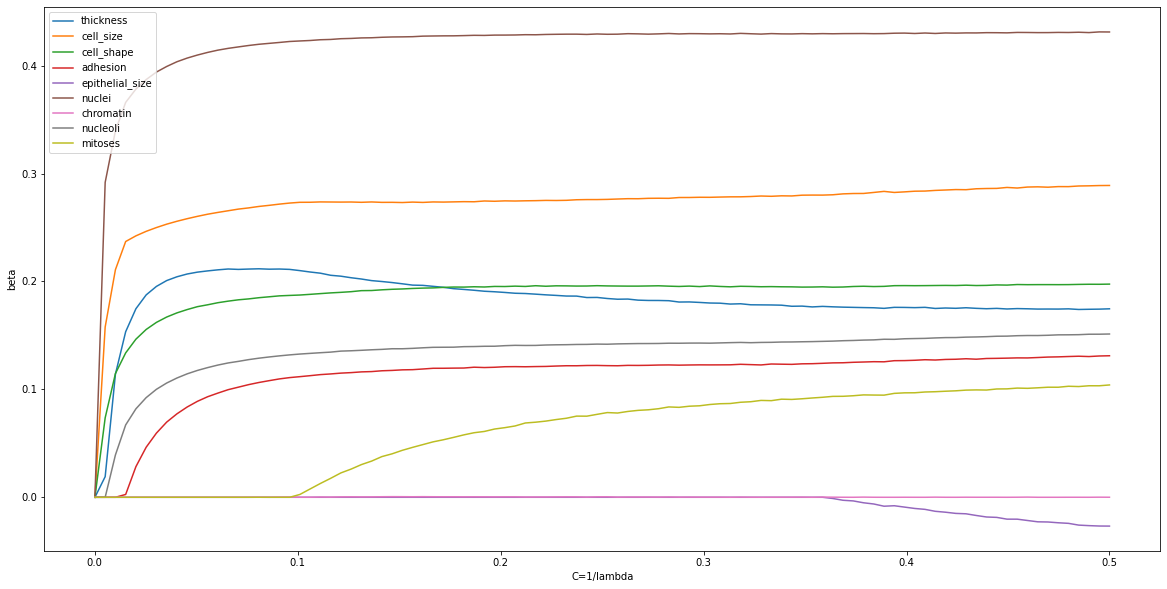

In [66]:
C_vals = np.linspace(1e-4, 0.5, 100)
betas = []

for C in C_vals:
    lasso = LogisticRegression(solver='saga', penalty='l1', C=C)
    lasso.fit(X_full_train, y_train)
    beta = lasso.coef_.reshape(-1)
    #beta = (beta - beta.min()) / beta.ptp()
    betas.append(beta)
betas = np.stack(betas, axis=1)  # [Nfeat, NCvals]

for beta, name in zip(betas, X_full_feat):
    plt.plot(C_vals, beta, label=name)
    
plt.legend()
plt.xlabel("C=1/lambda")
plt.ylabel("beta")
plt.gcf().set_size_inches(20,10)

From the graph we can see that:
- The last feature to disappear is **nuclei**, so we can think of that feature as the most important one for prediction.
- The first one to go to zero, instead, is **epithelial_size**.

The results are not consistent with what we previously assessed from the correlation matrix.

## Linear Discriminant Analysis

In [42]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
lda = lda.fit(X_full_train, y_train)

print("Train F1 score:", f1_score(y_train, lda.predict(X_full_train)))
print("Test F1 score:", f1_score(y_test, lda.predict(X_full_test)))

Train F1 score: 0.9516129032258065
Test F1 score: 0.9166666666666666


The f1 test score is lower than the one of Logistic Regression.

We now apply the Grid Search algorithm, together with Cross-validation, in order to find the best degree for polynomial linear discriminant analysis.

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

model = Pipeline([('poly', PolynomialFeatures()),
                  ('lda', LDA(store_covariance=True))])
params = {'poly__degree': range(1, 6)}
cv = GridSearchCV(model, params, refit=True, cv=10, 
                  scoring='f1')
cv.fit(X_full_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('lda',
                                        LinearDiscriminantAnalysis(store_covariance=True))]),
             param_grid={'poly__degree': range(1, 6)}, scoring='f1')

In [20]:
cv.best_params_
cv.best_score_
pd.DataFrame(cv.cv_results_)

{'poly__degree': 2}

0.9503087500455921

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_poly__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007783,0.001384,0.003880,0.001063,1,{'poly__degree': 1},0.944444,0.888889,0.972973,0.944444,0.944444,0.974359,0.914286,0.947368,0.95,0.972973,0.945418,0.025590,2
1,0.011975,0.002446,0.003869,0.000820,2,{'poly__degree': 2},0.974359,0.918919,0.947368,0.871795,0.972973,0.974359,0.972973,0.947368,0.95,0.972973,0.950309,0.031409,1
2,0.050655,0.008239,0.004500,0.001134,3,{'poly__degree': 3},0.823529,0.764706,0.823529,0.812500,0.733333,0.787879,0.687500,0.750000,0.80,0.709677,0.769265,0.045792,3
3,0.209462,0.035413,0.005123,0.001221,4,{'poly__degree': 4},0.750000,0.642857,0.750000,0.645161,0.689655,0.600000,0.709677,0.687500,0.75,0.709677,0.693453,0.048780,4
4,0.708353,0.114085,0.005306,0.000700,5,{'poly__degree': 5},0.666667,0.533333,0.787879,0.645161,0.592593,0.482759,0.571429,0.666667,0.60,0.571429,0.611792,0.080445,5


The optimal degree for LDA is polynomial degree = 2. 
We can also observe it graphically by creating a function that shows the mean test f1 trend for each estimator.

  (best 2) CV F1 score: 0.9503087500455921
  (best 2) Test F1 score: 0.9387755102040817


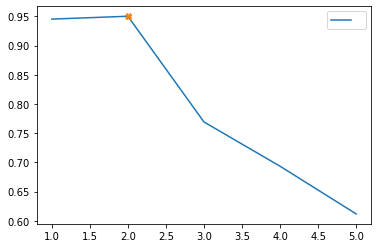

In [45]:
def show_results(cv, X_test, params, prefix=''):
    prefix = ' '+prefix    
    results = pd.DataFrame(cv.cv_results_)
    # Plot the CV (mean) scores for all possible parameters
    plt.plot(results[params], results['mean_test_score'], label=prefix)

    # Find the best
    best_idx = np.argmax(results['mean_test_score'])
    # Plot it as a cross
    plt.plot(results[params][best_idx], results['mean_test_score'][best_idx], marker='X')
    plt.legend()

    print(prefix, f"(best {results[params][best_idx]}) CV F1 score:",  cv.best_score_)
    print(prefix, f"(best {results[params][best_idx]}) Test F1 score:", f1_score(y_test, cv.best_estimator_.predict(X_test)))
    
show_results(cv, X_full_test, 'param_poly__degree')

The test F1 score has increased with respect to LDA, but got worse with repect to Logistic Regression.

## Quadratic Discriminant Analysis

In [47]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

qda = QDA(store_covariance=True)
qda = qda.fit(X_full_train, y_train)

print("Train F1 score:", f1_score(y_train, qda.predict(X_full_train)))
print("Test F1 score:", f1_score(y_test, qda.predict(X_full_test)))

Train F1 score: 0.9393939393939394
Test F1 score: 0.9494949494949494


The test F1 has increased with respect to LDA and is the same as F1 test of Logistic Regression.

## K-Nearest Neighbors - Hyperparameter Selection

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 15)}, scoring='f1')

  (best 3) CV F1 score: 0.9687780502928127
  (best 3) Test F1 score: 0.9278350515463918


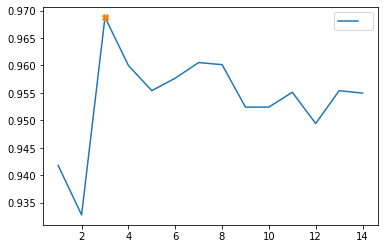

In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
params = {'n_neighbors': range(1, 15)}

cv = GridSearchCV(knn, params, cv=10, scoring='f1')
cv.fit(X_full_train, y_train)
show_results(cv, X_full_test, "param_n_neighbors")

Normalization is not needed since the features all span on the same range of values (1-10). The best number of neighbours is 3 for KNN, but still the F1 score is lower than the one of Logistic Regression and of QDA.

## Support Vector Machine

In [49]:
from sklearn.svm import SVC

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 5, 10]}
svc = SVC()
clf = GridSearchCV(svc, parameters, scoring='f1')
clf.fit(X_full_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 5, 10], 'kernel': ('linear', 'rbf')},
             scoring='f1')

In [50]:
best_model = clf.best_estimator_
best_model
train_pred = best_model.predict(X_full_train)
y_pred = best_model.predict(X_full_test)

print("Train F1 score:", f1_score(y_train, train_pred))
print("Test F1 score:", f1_score(y_test, y_pred))

SVC(C=1)

Train F1 score: 0.9765013054830288
Test F1 score: 0.9494949494949494


The test F1 is the same as for Logistic Regression.

### Grid Search for the best Kernel

In [51]:
# Polynomial
param_grid = {'C': np.linspace(0.001, 100, 5),
              'coef0': np.linspace(-10, 10, 5),
              'degree': [2, 3, 4]}
svm_poly = GridSearchCV(SVC(kernel='poly'), param_grid,
                        cv=10, scoring='f1', refit=True)
svm_poly.fit(X_full_train, y_train)

# RBF
param_grid = {'C': np.linspace(0.001, 100, 5),
              'gamma': np.linspace(0.001, 100, 5)}
rbf_poly = GridSearchCV(SVC(kernel='rbf'), param_grid, 
                        cv=10, scoring='f1', refit=True)
rbf_poly.fit(X_full_train, y_train)

# Sigmoid
param_grid = {'C': np.linspace(0.001, 100, 5),
              'gamma': np.linspace(0.001, 100, 5),
              'coef0': np.linspace(-10, 10, 5)}
sigm_poly = GridSearchCV(SVC(kernel='sigmoid'), param_grid, 
                         cv=10, scoring='f1', refit=True)
sigm_poly.fit(X_full_train, y_train)

GridSearchCV(cv=10, estimator=SVC(kernel='poly'),
             param_grid={'C': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02]),
                         'coef0': array([-10.,  -5.,   0.,   5.,  10.]),
                         'degree': [2, 3, 4]},
             scoring='f1')

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02]),
                         'gamma': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02])},
             scoring='f1')

GridSearchCV(cv=10, estimator=SVC(kernel='sigmoid'),
             param_grid={'C': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02]),
                         'coef0': array([-10.,  -5.,   0.,   5.,  10.]),
                         'gamma': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02])},
             scoring='f1')

In [27]:
for m in [svm_poly, rbf_poly, sigm_poly]:
    cv_score = m.best_score_
    m = m.best_estimator_
    m
    train_f1 = f1_score(y_train, m.predict(X_full_train))
    test_f1 = f1_score(y_test, m.predict(X_full_test))
    print("cv F1 score: {}".format(cv_score))
    print("train F1 score: {}".format(train_f1))
    print("test F1 score: {}\n".format(test_f1))

SVC(C=0.001, coef0=10.0, degree=4, kernel='poly')

cv F1 score: 0.9610893899725736
train F1 score: 0.9684210526315788
test F1 score: 0.9494949494949494



SVC(C=50.000499999999995, gamma=0.001)

cv F1 score: 0.9637920926752763
train F1 score: 0.9711286089238845
test F1 score: 0.9387755102040817



SVC(C=25.00075, gamma=0.001, kernel='sigmoid')

cv F1 score: 0.9637920926752763
train F1 score: 0.9660574412532636
test F1 score: 0.9387755102040817



The best test F1 score is obtained by the kernel = poly. The test F1 score is the same as default SVC and Logistic Regression.

## Which is the best model?

LinearDiscriminantAnalysis()

lda CV F1 score: 0.9454,  test F1 score 0.9167


Pipeline(steps=[('poly', PolynomialFeatures()),
                ('lda', LinearDiscriminantAnalysis())])

lda_poly CV F1 score: 0.9503,  test F1 score 0.9388


QuadraticDiscriminantAnalysis()

qda CV F1 score: 0.9294,  test F1 score 0.9495


KNeighborsClassifier(n_neighbors=3)

knn CV F1 score: 0.9688,  test F1 score 0.9278


SVC()

svc CV F1 score: 0.9616,  test F1 score 0.9495


SVC(C=0.001, coef0=10.0, degree=4, kernel='poly')

svc_poly CV F1 score: 0.9611,  test F1 score 0.9495


LogisticRegression()

lr CV F1 score: 0.9580,  test F1 score 0.9495


<AxesSubplot:xlabel='model', ylabel='score'>

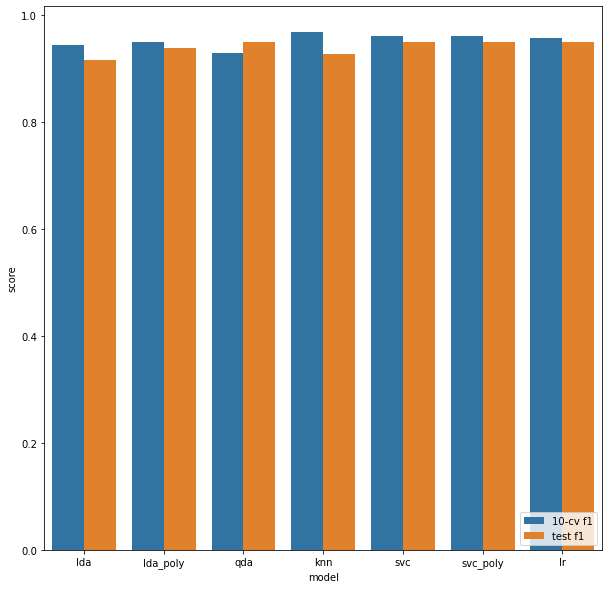

In [59]:
lda = LDA()                                                  # Linear Discriminant Analysis
lda_poly = Pipeline([('poly', PolynomialFeatures(degree=2)), # Polynomial Linear Discriminant Analysis
                  ('lda', LDA())])
qda = QDA()                                                  # Quadratic Discriminant Analysis
knn = KNeighborsClassifier(n_neighbors=3)                    # K-Nearest Neighbours
svc = SVC()                                                  # Support Vector Machine Classifier
svc_poly = SVC(C=0.001, coef0=10.0, degree=4, kernel='poly') # Polynomial Support Vector Machine Classifier
lr = LogisticRegression()                                    # Logistic Regression


from collections import OrderedDict
from sklearn.model_selection import cross_val_score
models = OrderedDict([('lda', lda), ('lda_poly', lda_poly), ('qda', qda), ('knn', knn), ('svc', svc), ('svc_poly', svc_poly), ('lr', lr)])

cv_scores, test_scores = [], []
for name, model in models.items():
    scores = cross_val_score(model, X_full_train, y_train, cv=10, scoring='f1')
    cv_score = scores.mean()
    cv_scores.append(cv_score)
    
    model.fit(X_full_train, y_train)
    test_score = f1_score(y_test, model.predict(X_full_test))
    test_scores.append(test_score)
    print("{} CV F1 score: {:.4f},  test F1 score {:.4f}".format(name, cv_score, test_score))

data = pd.DataFrame()
data['model'] = list(models.keys()) * 2
data['metric'] = ['10-cv f1'] * len(cv_scores) + ['test f1'] * len(test_scores)
data['score'] = cv_scores + test_scores

sns.barplot(x='model', y='score', data=data, hue='metric')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(10,10)

The best test F1 scores are obtained by QDA, SVC with kernel=rbf, SVC with kernel=poly and Logistic Regression.

# ROC curves

The best model is the one having a ROC curve that hugs the top left corner, having a very high true positive rate and a very lor false positive rate. 

The higher the area under the curve (AOC) the better the model!

LogisticRegression()

LinearDiscriminantAnalysis()

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('lda', LinearDiscriminantAnalysis())])

QuadraticDiscriminantAnalysis()

SVC(probability=True)

SVC(C=0.001, coef0=10.0, degree=4, kernel='poly', probability=True)

KNeighborsClassifier(n_neighbors=3)

<Figure size 1440x720 with 0 Axes>

([<matplotlib.axis.XTick at 0x7f7795f38400>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 0, 'False Positive Rate')

([<matplotlib.axis.YTick at 0x7f77961bc1c0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve Analysis')

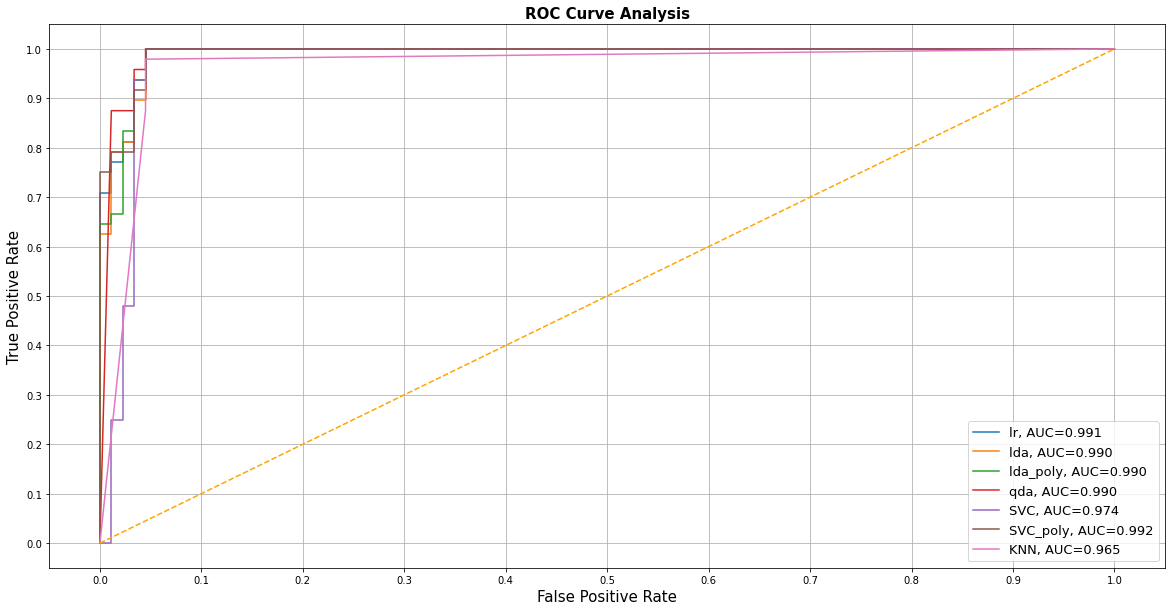

In [60]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

lda = LDA()                                                                     # Linear Discriminant Analysis
lda_poly = Pipeline([('poly', PolynomialFeatures(degree=2)),                    # Polynomial Linear Discriminant Analysis
                  ('lda', LDA())])
qda = QDA()                                                                     # Quadratic Discriminant Analysis
knn = KNeighborsClassifier(n_neighbors=3)                                       # K-Nearest Neighbours
svc = SVC(probability = True)                                                   # Support Vector Machine Classifier
svc_poly = SVC(C=0.001, coef0=10.0, degree=4, kernel='poly', probability= True) # Polynomial Support Vector Machine Classifier
lr = LogisticRegression()                                                       # Logistic Regression

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
for name, model in [('lr', lr), 
                    ('lda', lda),
                    ('lda_poly', lda_poly), 
                    ('qda', qda),
                    ('SVC', svc),
                    ('SVC_poly',svc_poly),
                    ('KNN', knn)]:
    model.fit(X_full_train, y_train)
    y_pred_proba = model.predict_proba(X_full_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    result_table = result_table.append({'classifiers':name,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

plt.figure(figsize=(20,10))
for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--') # this line represents the random guess

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.grid()
plt.show()

The diagonal represents a random guess model that (in the case of two classes) output positive with 50% probability.

We can see that the most optimal ROC curve is the SVC_poly with an AUC of 0.992.

### Decision boundary

In our case, to plot the decision boundaries for our models, would imply a dimensionality reduction. 
As all the variables are correlated to the class, the graphical representation would lose information.

# 5. Results and conclusions

In accordance with the used classifiers F1 scores, we have compared the results in order to
acquire the preferable method for the classification of benign/malignant cells in breast cancer.
We have also compared the results considering the AUC value for each classifier.

From our analysis, we have obtained that the best classifier is SVC with polynomial kernel, degree=4, C=0.001, coef0=10.0.
It has scored F1=0.9495 and AUC=0.992.

However, we have obtained the same test F1 score also for Logistic Regression, which is a way more simpler model, with  AUC=0.991.

There is a trade-off between model simplicity and efficacy and this should be taken into account for what is more beneficial to the final purpose of the anlysis.